In [52]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [53]:
emission_df = pd.read_csv('co2_greenHouseGas_Emissions.csv')
emission_df.head()

,Region,CO2 Emissions (Mt),Greenhouse Gas Emissions (Mt),Continent
0,Afghanistan,5.68,98.9,Asia
1,Albania,4.49,10.1,Europe
2,Algeria,177.08,218.9,Africa
3,Angola,20.19,79.7,Africa
4,Anguilla,0.02,NaN,North America


In [54]:
# Display columns data type
emission_df.dtypes

,0
Region,object
CO2 Emissions (Mt),object
Greenhouse Gas Emissions (Mt),object
Continent,object


In [55]:
#Null values
print(emission_df.isnull().sum())
emission_df[emission_df.isnull()['Greenhouse Gas Emissions (Mt)']]

Region                            0
CO2 Emissions (Mt)                0
Greenhouse Gas Emissions (Mt)    25
Continent                         0
dtype: int64


,Region,CO2 Emissions (Mt),Greenhouse Gas Emissions (Mt),Continent
4,Anguilla,0.02,NaN,North America
8,Aruba,0.46,NaN,North America
12,Bahamas,1.45,NaN,North America
20,Bermuda,0.32,NaN,North America
26,British Virgin Islands,0.06,NaN,North America
34,Cape Verde,1.02,NaN,Africa
35,Cayman Islands,0.31,NaN,North America
42,Cook Islands,0.11,NaN,Oceania
46,Curacao,2.05,NaN,North America
65,French Guiana,0.35,NaN,South America


In [56]:
emission_df.fillna('0', inplace=True)

In [57]:
#dublicates
print(f'Num of dublicates: {emission_df.duplicated().sum()}')

Num of dublicates: 0


#Data Featuring

In [58]:
emission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Region                         204 non-null    object
 1   CO2 Emissions (Mt)             204 non-null    object
 2   Greenhouse Gas Emissions (Mt)  204 non-null    object
 3   Continent                      204 non-null    object
dtypes: object(4)
memory usage: 6.5+ KB


In [59]:
try:
    emission_df['CO2 Emissions (Mt)'].astype(float)
except ValueError as e:
    print(e)

could not convert string to float: '12.67 K'


In [60]:
#Turns out data has prefixes kilo and mega, so now we normalize units by removin them using .apply method in pandas.
prefixes = {
    'K':[-2, 1_000],
    'M':[-1, 1_000_000]
}

def prefix_remover(value):
    try:
        if value[-1] in prefixes:
            margin, multiplier = prefixes[value[-1]]
            return float(value[:margin]) * multiplier
        else:
            return float(value)

    except (ValueError, TypeError) as e:
        print(f"Error processing value '{value}': {e}")
        return None

CO2_em = emission_df['CO2 Emissions (Mt)'].apply(prefix_remover)
GH_em = emission_df['Greenhouse Gas Emissions (Mt)'].apply(prefix_remover)

emission_df['CO2 Emissions (Mt)'] = CO2_em
emission_df['Greenhouse Gas Emissions (Mt)'] = GH_em

In [61]:
emission_df.head()

,Region,CO2 Emissions (Mt),Greenhouse Gas Emissions (Mt),Continent
0,Afghanistan,5.68,98.9,Asia
1,Albania,4.49,10.1,Europe
2,Algeria,177.08,218.9,Africa
3,Angola,20.19,79.7,Africa
4,Anguilla,0.02,0.0,North America


In [62]:
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=(
        'Total CO2 Emissions (Mt) by Continent',
        'Total Greenhouse Gas Emissions (Mt) by Continent'
    ),
    vertical_spacing=0.1,
)

emission_by_continents = emission_df.groupby('Continent').sum()[['CO2 Emissions (Mt)', 'Greenhouse Gas Emissions (Mt)']]
CO2_EbC = emission_by_continents.sort_values('CO2 Emissions (Mt)', ascending=False)
GHG_EbC = emission_by_continents.sort_values('Greenhouse Gas Emissions (Mt)', ascending=False)

fig.add_trace(
    go.Bar(
        x=CO2_EbC.index,
        y=CO2_EbC['CO2 Emissions (Mt)'],
        name='CO2 Emissions (Mt)',
        showlegend=False
    ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
        x=GHG_EbC.index,
        y=GHG_EbC['Greenhouse Gas Emissions (Mt)'],
        name='Greenhouse Gas Emissions (Mt)',
        showlegend=False
    ),
    row=2, col=1
)

fig.update_layout(height=800, margin=dict(t=40,r=0,b=20,l=40))
fig.show()

In [63]:
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=(
        'Highest CO2 Emissions (Mt) by Country',
        'Highest Greenhouse Gas Emissions (Mt) by Country'
    ),
    vertical_spacing=0.1,
)

highest_emission_CO2 = emission_df.sort_values('CO2 Emissions (Mt)', ascending=False).iloc[:20]
highest_emission_GHG = emission_df.sort_values('Greenhouse Gas Emissions (Mt)', ascending=False).iloc[:6]

fig.add_trace(
    go.Bar(
        x=highest_emission_CO2['Region'],
        y=highest_emission_CO2['CO2 Emissions (Mt)'],
        name='CO2 Emissions (Mt)',
        showlegend=False
    ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
        x=highest_emission_GHG['Region'],
        y=highest_emission_GHG['Greenhouse Gas Emissions (Mt)'],
        name='Greenhouse Gas Emissions (Mt)',
        showlegend=False
    ),
    row=2, col=1
)

fig.update_layout(height=1000, margin=dict(t=40,r=0,b=20,l=40))
fig.show()

In [64]:
#10 countries with the lowest C02 emission
emission_df = emission_df.sort_values(by='CO2 Emissions (Mt)', ascending=True).head(10)
emission_df

,Region,CO2 Emissions (Mt),Greenhouse Gas Emissions (Mt),Continent
4,Anguilla,0.02,0.0,North America
155,Saint Pierre and Miquelon,0.04,0.0,North America
26,British Virgin Islands,0.06,0.0,North America
99,Kiribati,0.07,110.0,Oceania
52,Dominica,0.07,240.0,North America
156,Saint Vincent and the Grenadines,0.08,370.0,North America
189,Turks and Caicos Islands,0.09,0.0,North America
153,Saint Kitts and Nevis,0.10,370.0,North America
42,Cook Islands,0.11,0.0,Oceania
75,Grenada,0.12,2.4,North America


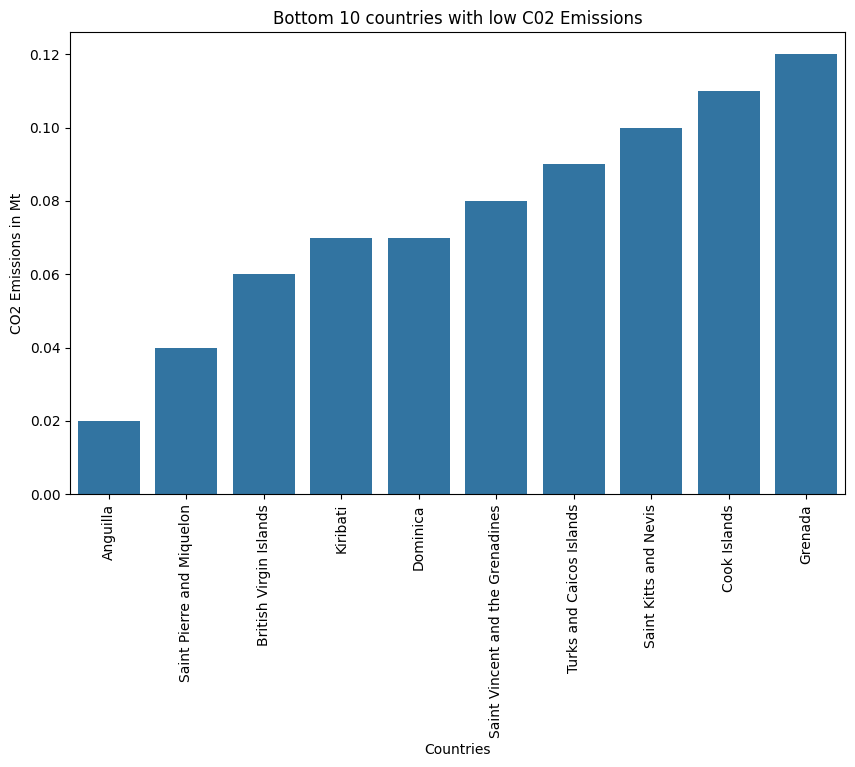

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Region", y="CO2 Emissions (Mt)", data=emission_df)

plt.title('Bottom 10 countries with low C02 Emissions')
plt.xlabel('Countries')
plt.ylabel('CO2 Emissions in Mt')
plt.xticks(rotation=90)
plt.show()